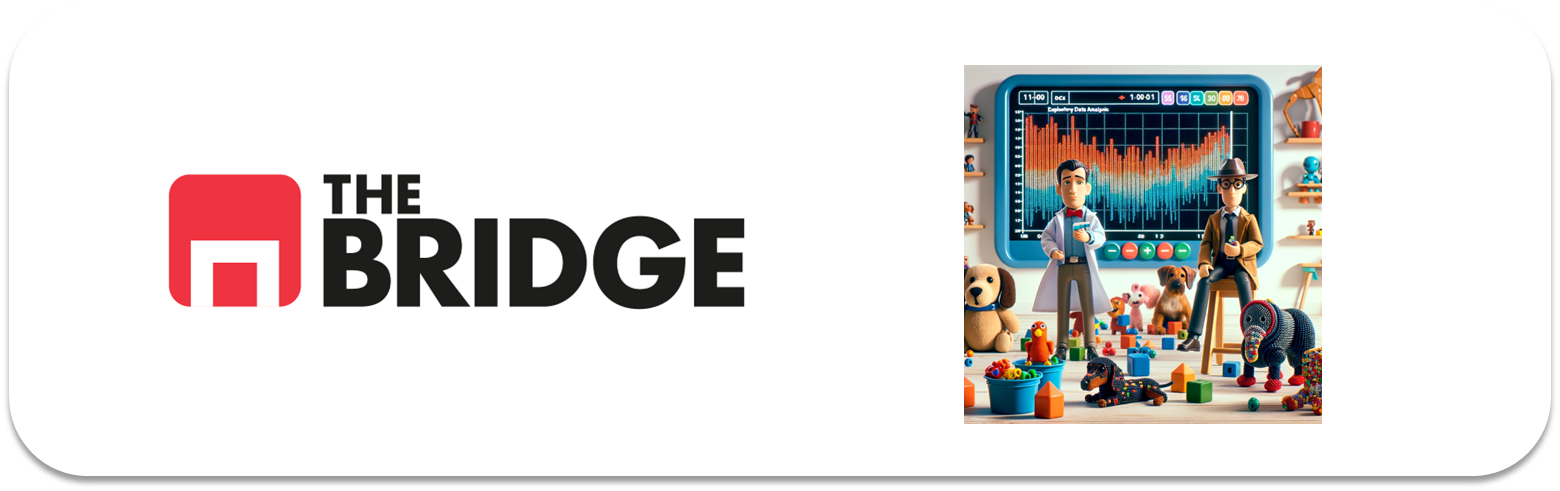

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp

In [7]:
df_titanic.drop(["parch","sibsp"], axis = 1, inplace= True)

KeyError: "['parch', 'sibsp'] not found in axis"

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic.embark_town.mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

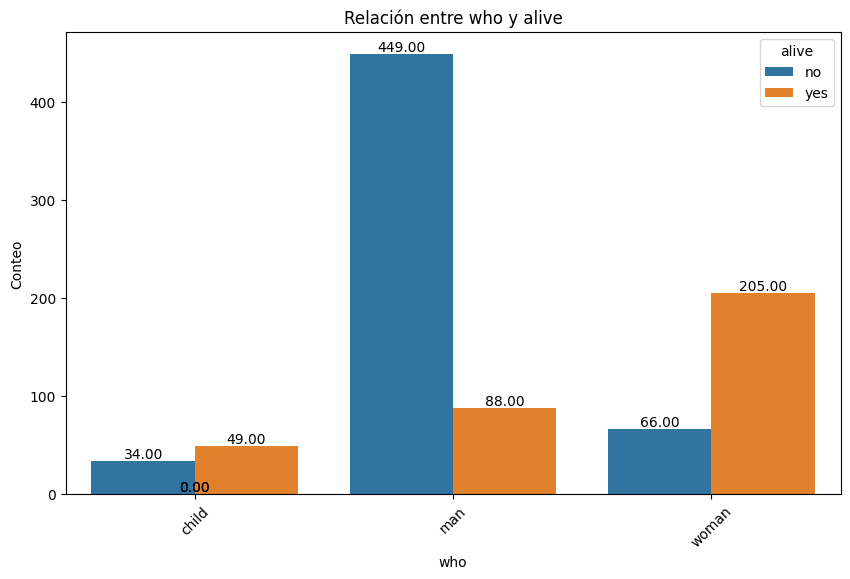

In [10]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

Vemos que murieron mas hombres en terminos absolutos que cualquier otra categoria, lo que nos da un indicio de que parece existir una relacion entre el sexo y la supervivencia.

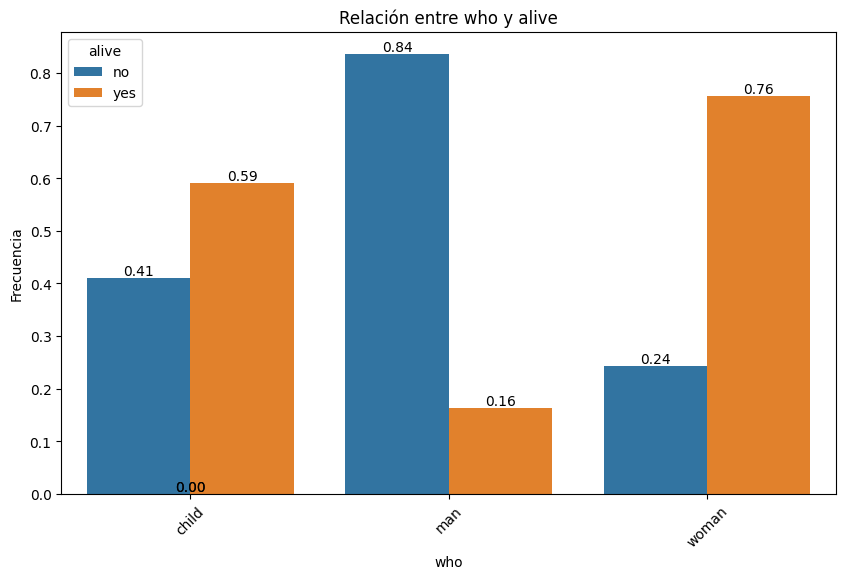

In [11]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq= True, show_values= True)

Ahora vemos que en terminos relativos tambien se da esta relacion, el 84% de los hombres murieron, esto es cuatro veces el porcentaje de mujeres que murieron y el doble que el porcentaje de niños.

In [15]:
tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


Haciendo el chi cuadrado podemos confirmar que existe una relacion entre "who" y "alive" la cual es estadisticamente negativa, es decir, que ser hombre en el titanic aumentaba las posibilidades de no sobrevivir.

### 1.6.2

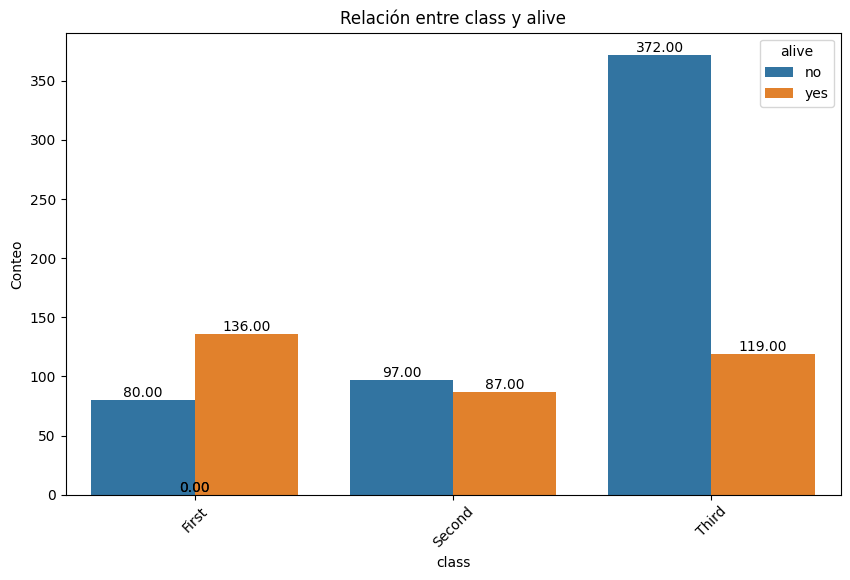

In [16]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

########### Vemos que sobrevieron muchos mas pasajeros de primera que de tercera, lo que parece ser contraintuitivo si no influyera la clase de alguna manera 

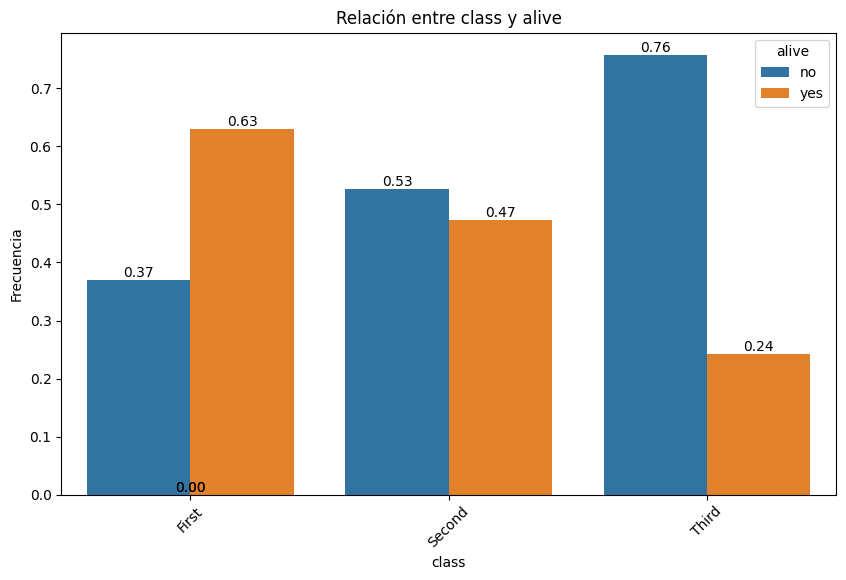

In [17]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq= True, show_values= True)
###### Podemos ver que en terminos relativos cuanto mas alta es la clase es mayor el procentaje de personas que se salvan. 

Vamos a hacer el test de chi-2 para comprobar si existe una relacion o no.

In [18]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Podemos ver, otra vez, que existe una relacion entre la clase y la supervivencia. 

## 1.6.3

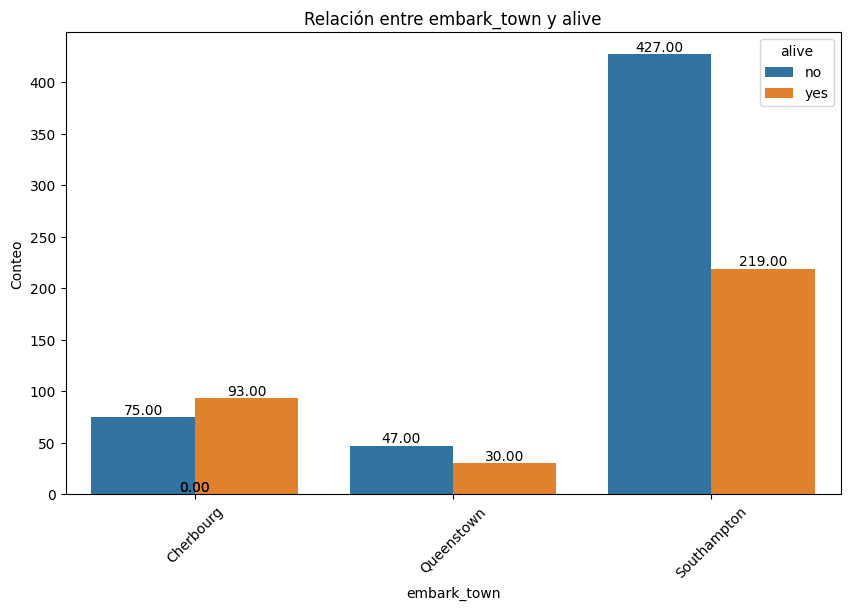

In [19]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

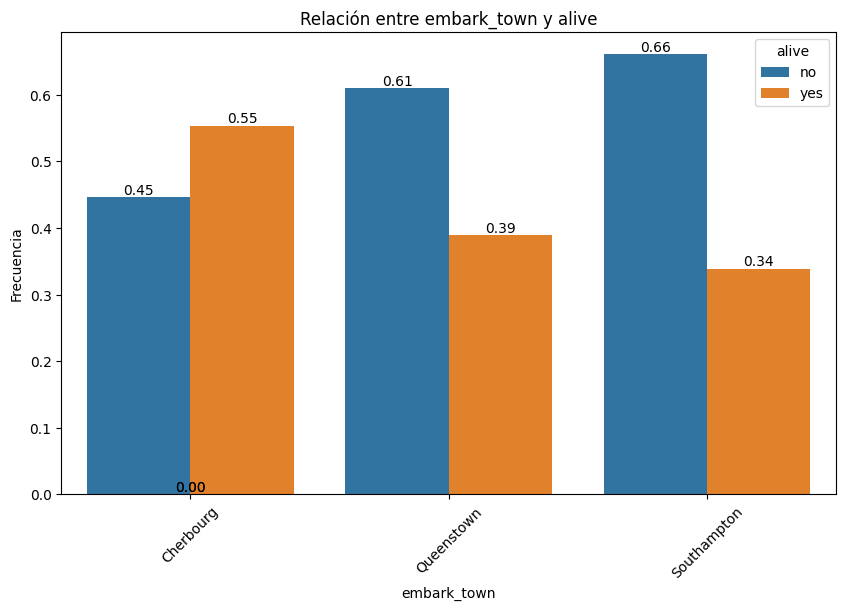

In [20]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq= True)

Podemos ver que aunque embargaron mas en Southampton el ratio de supervivencia en esta ciudad es el mas bajo de las tres, por que? Debe estar realcionado con otra de la variables, solo con esto no tenemos una razon clara. 

Hacemos chi cuadrado para confirmar:

In [21]:
tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


El test confirma que existe esta relacion. 

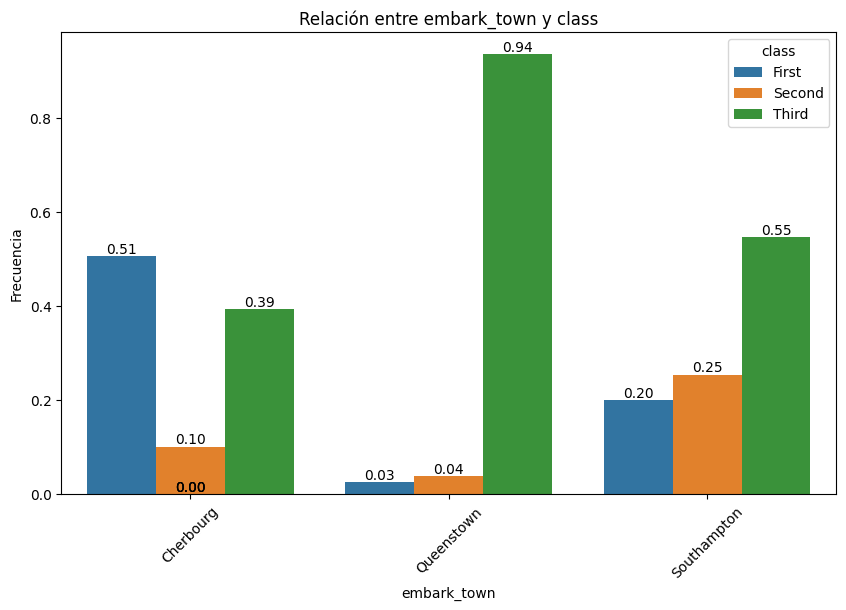

In [22]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

Aqui busco una relacion entre los embarques y las clases de los mismos, al ver que la mayoria de primera clase embarcan en Cherbourg puedo suponer que, al menos, uno de los factores que afectó a la grafica anterior es la clase. Aunque lo de Queenstown me invita a pensar que al ser tantos de tercera clase su numero de supervivencia deberia ser menos.

## 1.6.4 


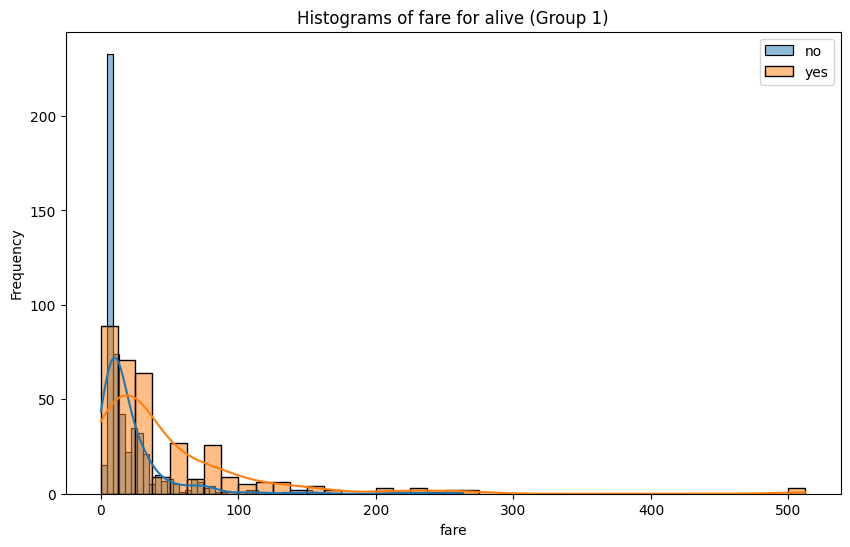

In [23]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

In [24]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


Visualmente podemos interpertar que hay una relacion entre el fare y el alive, lo que nos viene a confirmar el valor de p. 

## 1.6.5


In [25]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


Desconozco por que no habran pagado todas estas personas, son todos hombres ademas, lo que hace pensar que posiblemente eran empleados. 


In [26]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


Eran tres personas las que pagaron el fare mas alto, todas sobrevivieron.

## 1.6.6

In [27]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)

Respuesta Southampton:


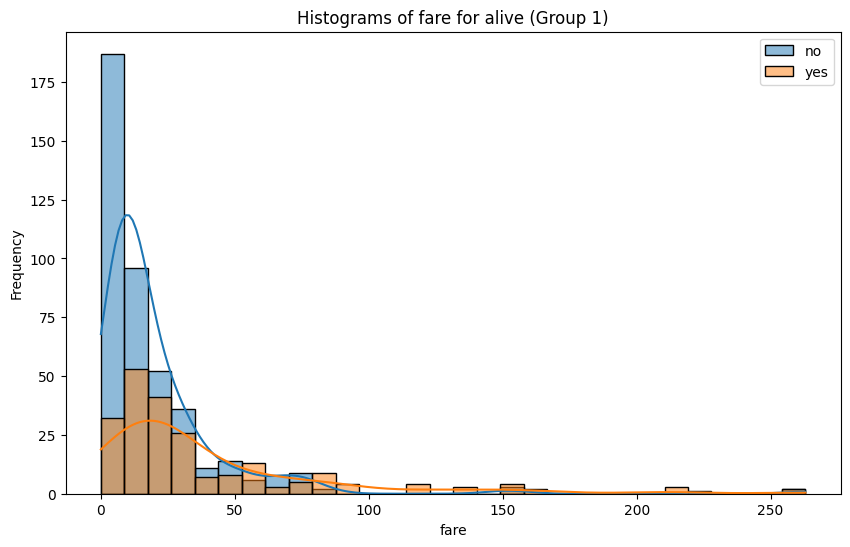

Respuesta Cherbourg:


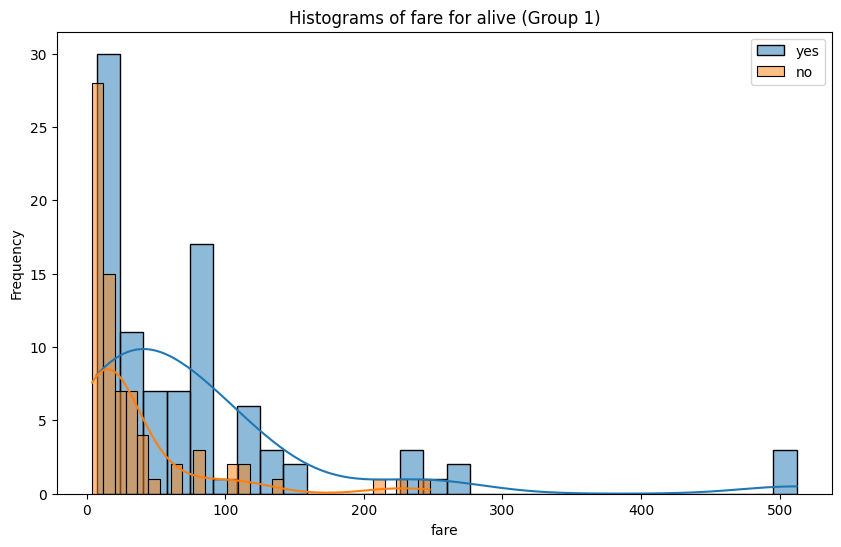

Respuesta Queenstown:


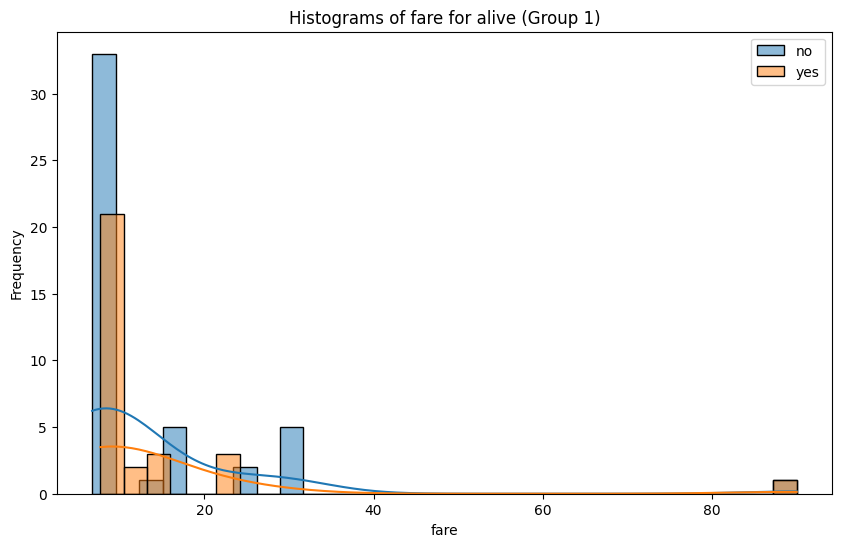

In [28]:
trivariant_analysis(df_titanic, "embark_town","alive","fare", 2, 30)

## 1.6.7

In [29]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [33]:
#Dividimos las edades por grupos 
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])


Respuesta age_1:


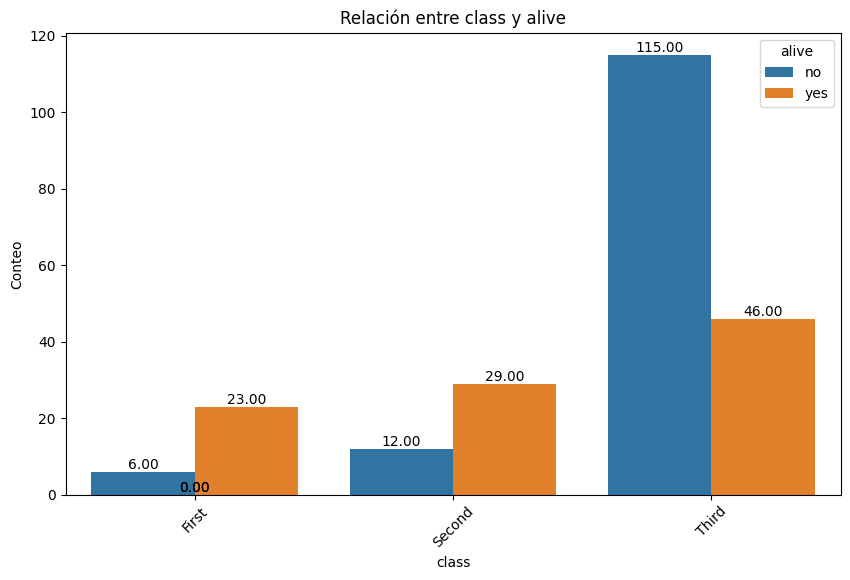

Respuesta age_4:


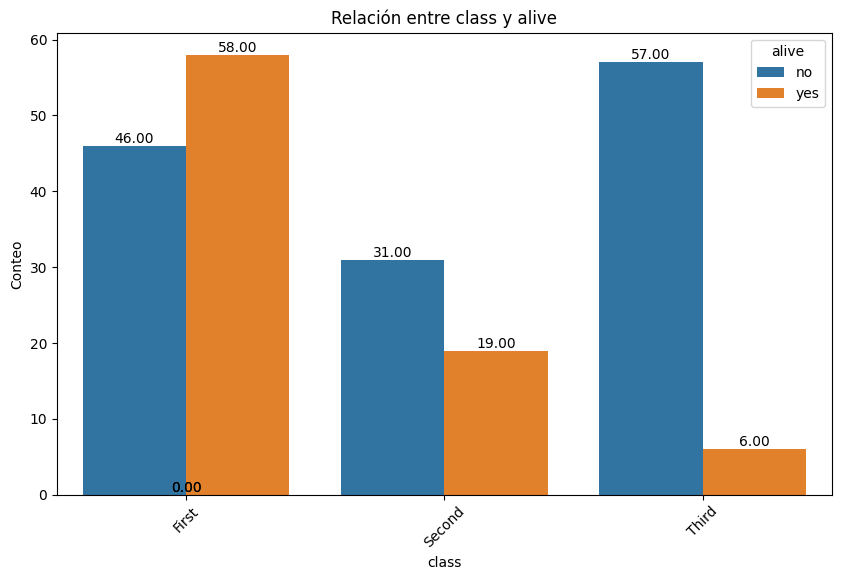

Respuesta age_2:


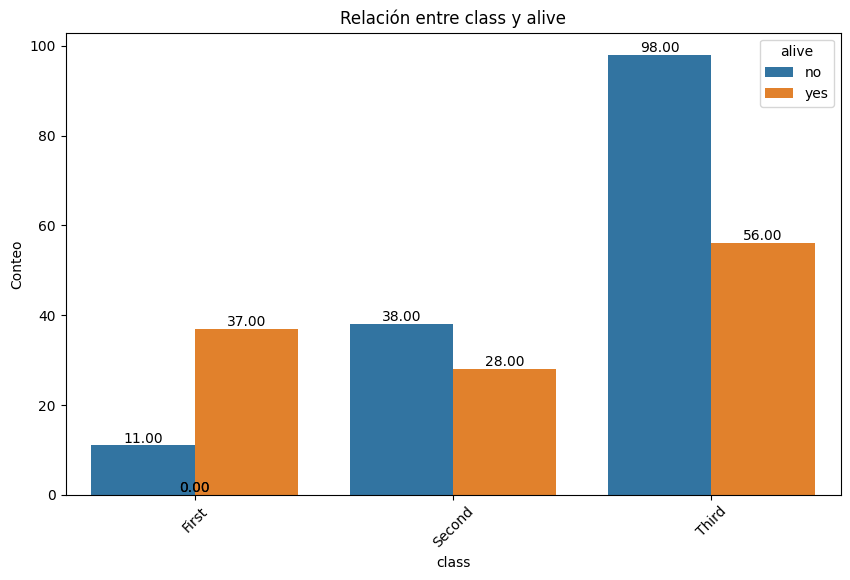

Respuesta age_3:


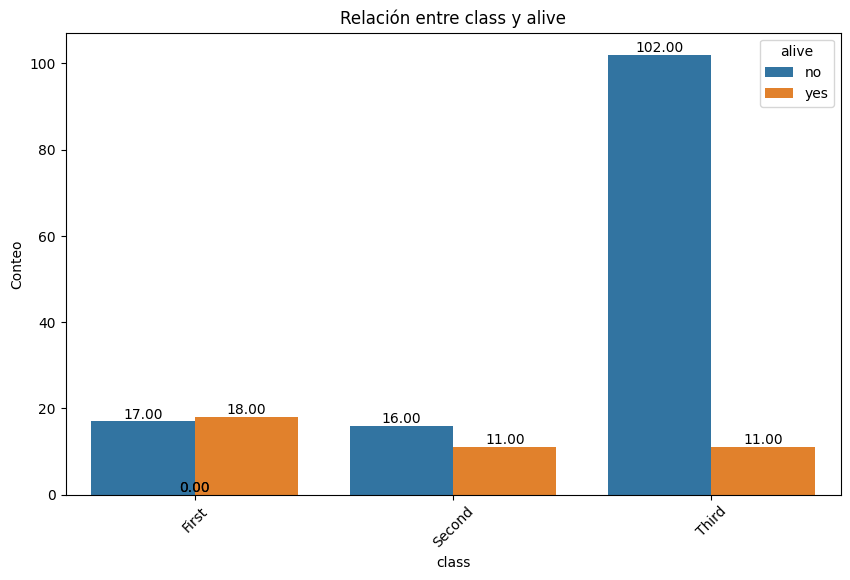

In [32]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)
        
tricategorical_analysis(df = df_titanic, directora = "cat_age", otras = ["alive","class"], muestra_valores = True)

En términos absolutos se salvaron más personas que viajaban en primera clase y eran mayores de 35 años

## 1.6.8

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [34]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")


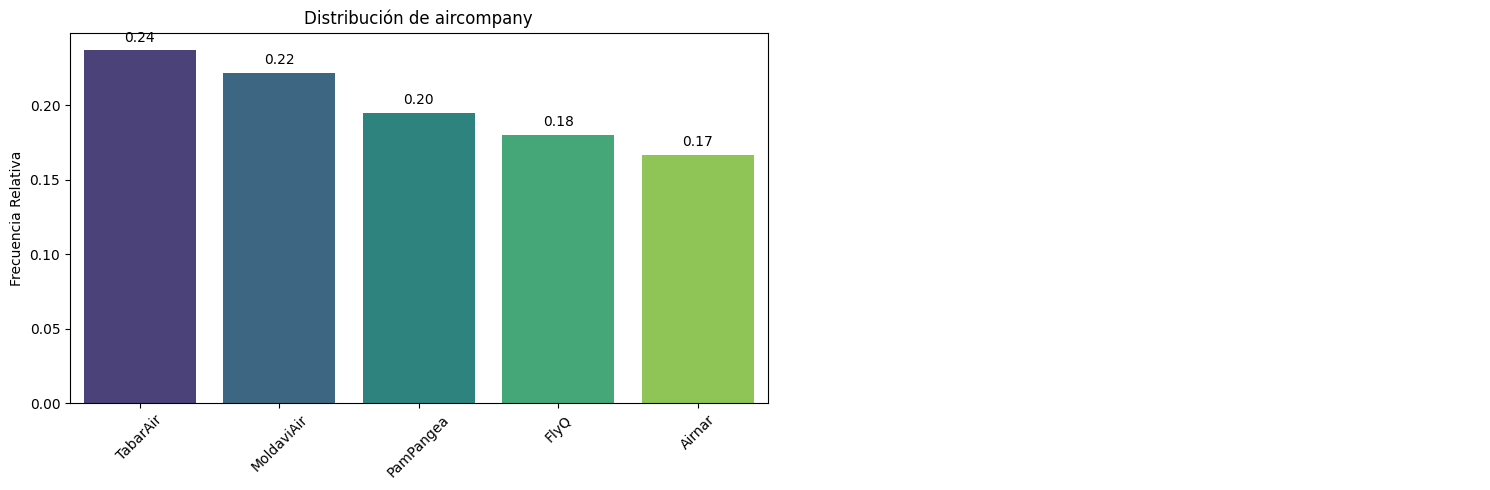

In [35]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


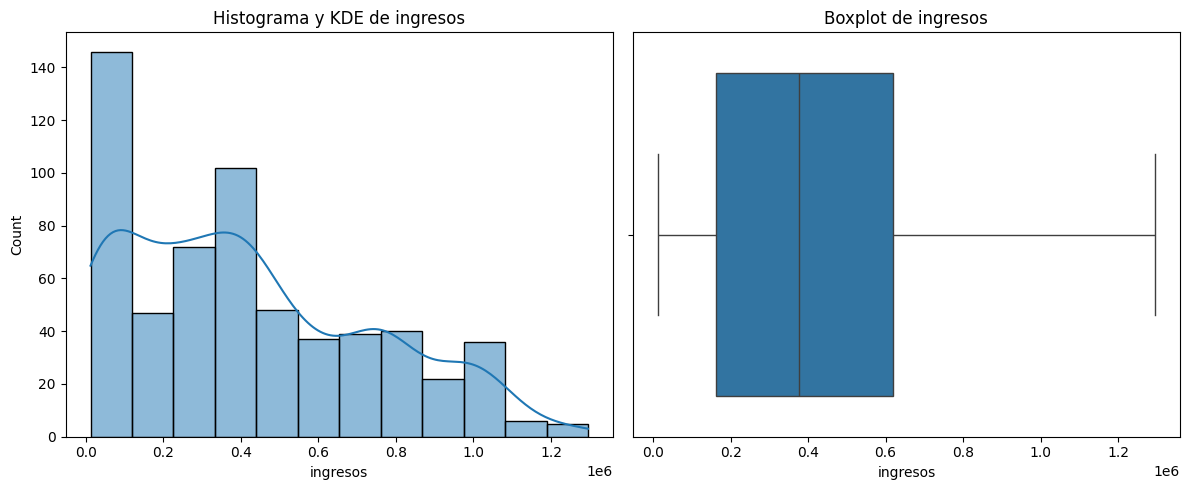

In [36]:
plot_combined_graphs(df_viajes,["ingresos"])

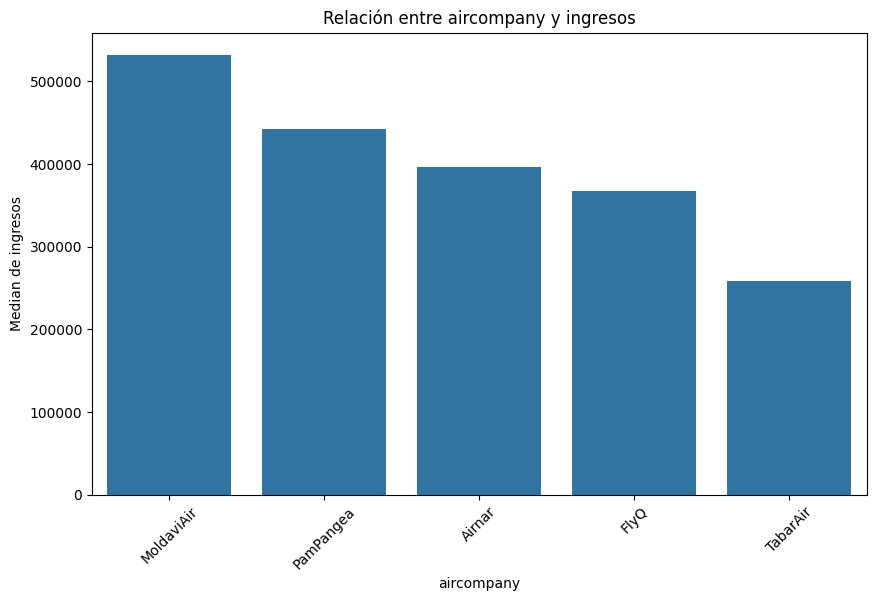

In [37]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median")

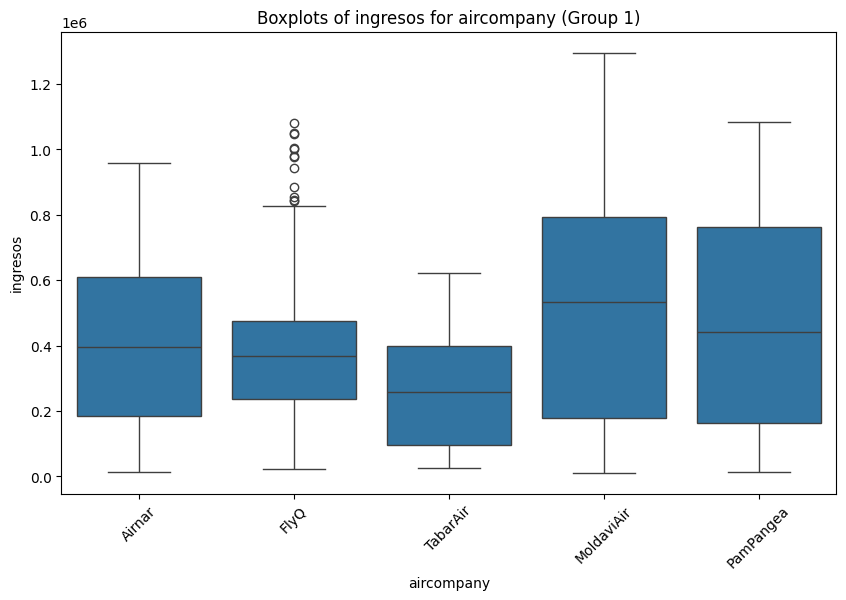

In [38]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

Se puede ver que TabaAir es el que menos ingresa por sus viajes, con mucha diferencia. Aunque es la que mas viajes hace como vimos en el primer grafico.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

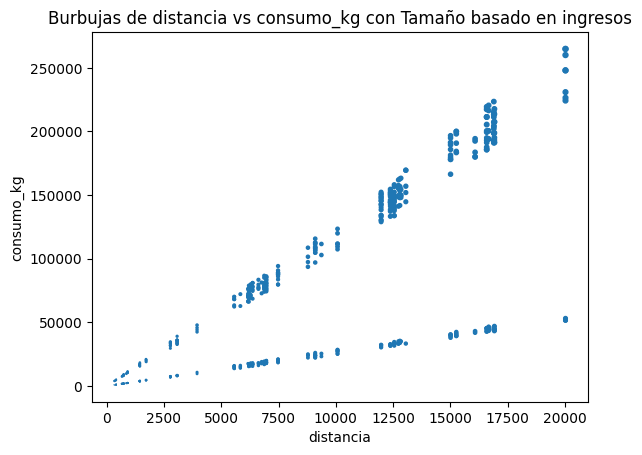

In [39]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

Lo que se ve interesante es que hay una linea de viajes que es mucho mas eficiente que las demas en ciertos puntos, se podria buscar explotar esto

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


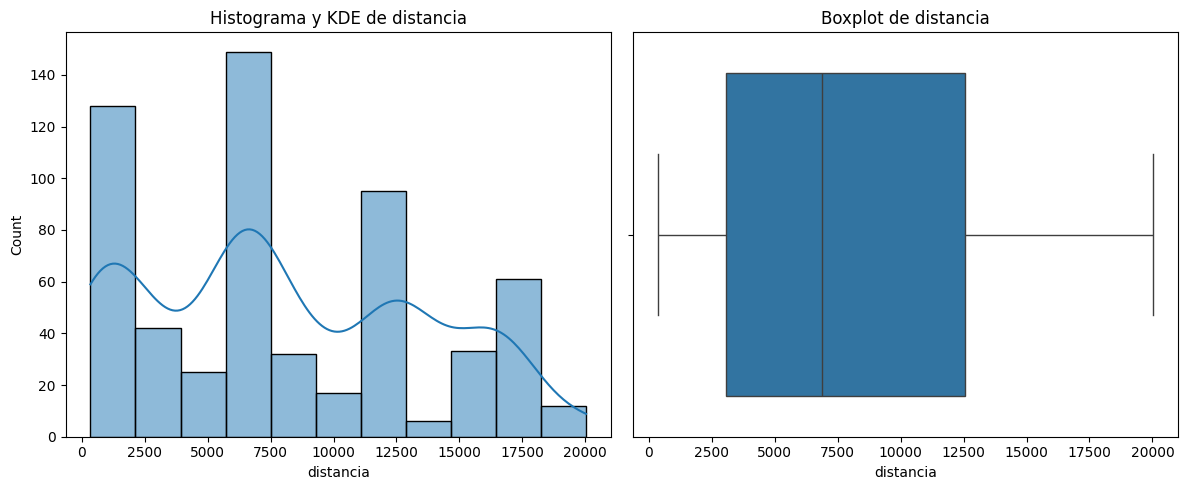

In [40]:
plot_combined_graphs(df_viajes,["distancia"])

In [43]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins = [0,5000, 10000,15000, df_viajes.distancia.max()], labels = ["cat1","cat2","cat3","cat4"])

In [44]:
pd.crosstab(df_viajes["aircompany"],df_viajes["cat_vuelo"])

cat_vuelo,cat1,cat2,cat3,cat4
aircompany,,,,
Airnar,31,37,25,7
FlyQ,24,50,24,10
MoldaviAir,34,19,33,47
PamPangea,33,23,19,42
TabarAir,54,75,13,0


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.